In [1]:
%matplotlib inline

from pylab import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

Exponential Sampling
====================

The traditional approach—used by path tracing, photon mapping, and photon diffusion for choosing propagation distances in homogeneous media -- is exponentially-decreasing sampling with a PDF:

$
t_i = - \frac{\log(1 - \xi_i)}{\sigma}
$
with
$\text{pdf}_{\exp}(t_i)=\sigma e^{-\sigma t_i}$


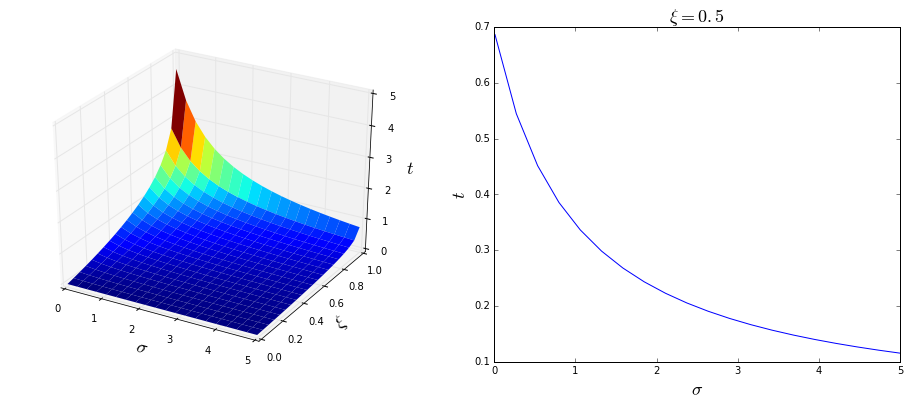

In [2]:
# Sigma
sx = linspace(0.01, 5, 20)
# Random variety on (0,1)
i = 0.5
sy = linspace(0, .99, 20)
sz = - log(1. - i) / (1 + sx)

X, Y = meshgrid(sx, sy)

Z = - log(1. - Y) / (1 + X)

fig = figure(figsize = (16,6))

ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel(r"$\sigma$", fontsize=18)
ax.set_ylabel(r"$\xi$", fontsize=18)
ax.set_zlabel(r"$t$", fontsize=18)

bx = fig.add_subplot(122)
bx.set_xlabel(r"$\sigma$", fontsize=18)
bx.set_ylabel(r"$t$", fontsize=18)
bx.set_title(r"$\xi = {}$".format(i), fontsize=18)

b = bx.plot(sx, sz)

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)

Phase Function
==============
$g$ - Assymetry factor,
$\theta$ - angle between incoming and outgoing rays
Henyey-Greenstein
-----------------

$$
p_{\text{HG}} (\cos \theta)= \frac{1}{4\pi} \frac{1 - g^2}{(1 + g^2 - 2g(\cos \theta))^{3/2}}
$$

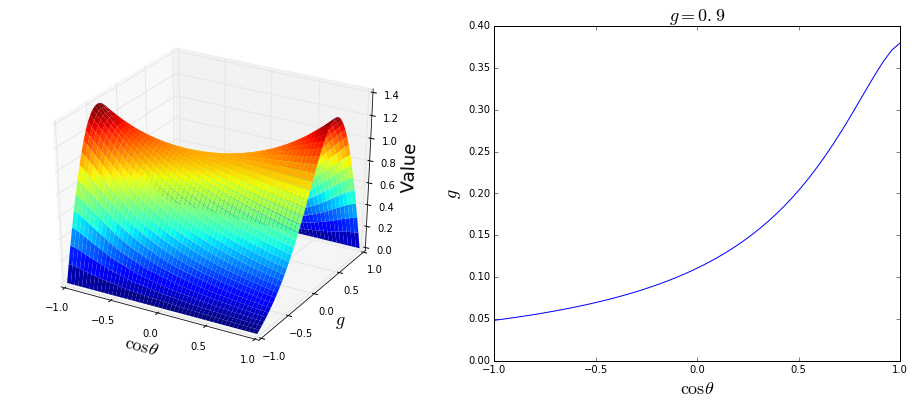

In [3]:
def henyeygreenstein(theta, g = .0):
    return 2 * (1 - g**2) / (1 + (1 + g**2 - 2 * g * theta)**(3/2))

g = 0.9
# cos theta
sx = linspace(-1, 1, 50)
# Assymetry
sy = linspace(-1, 1, 50)
sz = henyeygreenstein(sx, g)

X, Y = meshgrid(sx, sy)
Z = henyeygreenstein(X, Y)

fig = figure(figsize = (16,6))

hg = fig.add_subplot(121, projection='3d')
hg.set_xlabel(r"$\cos\theta$", fontsize=18)
hg.set_ylabel(r"$g$", fontsize=18)
hg.set_zlabel("Value", fontsize=18)
#hg.set_zlim(top=10)

hx = fig.add_subplot(122)
hx.set_xlabel(r"$\cos\theta$", fontsize=18)
hx.set_ylabel(r"$g$", fontsize=18)
hx.set_title(r"$g = {}$".format(g), fontsize=18)

b = hx.plot(sx, sz)

p = hg.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)